# Run sorters

In [1]:
import spikeinterface.full as si
from pathlib import Path

In [2]:
si.set_global_job_kwargs(n_jobs=-1, chunk_duration="1s", progress_bar=True)

In [3]:
# change these if working on your laptop
base_data_folder = Path("/mnt/data/sam/DataSpikeSorting/school_neuralnet_2025/raw_datas/")
working_folder = Path("/mnt/data/sam/DataSpikeSorting/school_neuralnet_2025/results")

# base_data_folder = Path("/home/samuel/DataSpikeSorting/school_neuralnet_2025/raw_datas/")
# working_folder = Path("/home/samuel/DataSpikeSorting/school_neuralnet_2025/results")

# base_data_folder = Path("/home/pierre/data/gdr/bordeaux/raw_datas/")
# working_folder = Path("/home/pierre/data/gdr/bordeaux/results")


recording_name = "M25_D23_2024-11-11_13-11-10_OF1"


In [4]:
results_folder = working_folder / recording_name

### Reload previous preprocessing

In [5]:
preprocess_folder = results_folder / "preprocessed"
if not preprocess_folder.is_dir():
    # in case the preprocessing is not done
    # lets do a quick one
    oe_folder = base_data_folder / recording_name
    full_raw_rec = si.read_openephys(oe_folder)
    full_raw_rec
    recording_f = si.bandpass_filter(full_raw_rec, freq_min=250., freq_max=6000.)
    recording_cmr = si.common_reference(recording_f, reference='global', operator='median')
    rec_preprocessed = recording_cmr
    print(rec_preprocessed)    
    recording_saved = rec_preprocessed.save(folder=preprocess_folder)
recording_saved = si.load(preprocess_folder)
recording_saved

BinaryFolderRecording: 384 channels - 30.0kHz - 1 segments - 29,363,947 samples 
                       978.80s (16.31 minutes) - int16 dtype - 21.00 GiB

In [7]:
# %matplotlib widget
# si.plot_traces(recording_saved, backend="ipywidgets")

### Check installation

We can now run spike sorting on the above recording. We will use different spike sorters for this demonstration, to show how easy SpikeInterface makes it easy to interchengably run different sorters :)

Let's first check the available and installed sorters in `SpikeInterface`.
We will sort the bandpass cached filtered recording the `recording_saved` object.

In [8]:
si.available_sorters()

['combinato',
 'hdsort',
 'herdingspikes',
 'ironclust',
 'kilosort',
 'kilosort2',
 'kilosort2_5',
 'kilosort3',
 'kilosort4',
 'kilosort4like',
 'lupin',
 'mountainsort4',
 'mountainsort5',
 'pykilosort',
 'rtsort',
 'simple',
 'spykingcircus',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2',
 'waveclus',
 'waveclus_snippets',
 'yass']

In [8]:
si.installed_sorters()

['kilosort4',
 'kilosort4like',
 'lupin',
 'simple',
 'spykingcircus2',
 'tridesclous2']

The `spikeinterface.sortingcomponents` module includes functions that can be used to create custom spike sorting pipelines built-in in `SpikeInterface`. It is still experimental and under heavy development, but there are already 3  SI-based sorters available:

* `tridesclous2` (developed by Samuel Garcia)
* `spykingcircus2` (developed by Pierre Yger)
* `simple` which is only for demo and teaching

They can be run with the same `run_sorter` function, but they don't require any additional installation!

In [9]:
si.run_sorter?

Signature:
si.run_sorter(
    sorter_name: 'str',
    recording: 'BaseRecording | dict',
    folder: 'Optional[str]' = None,
    remove_existing_folder: 'bool' = False,
    delete_output_folder: 'bool' = False,
    verbose: 'bool' = False,
    raise_error: 'bool' = True,
    docker_image: 'Optional[Union[bool, str]]' = False,
    singularity_image: 'Optional[Union[bool, str]]' = False,
    delete_container_files: 'bool' = True,
    with_output: 'bool' = True,
    **sorter_params,
)
Docstring:
Generic function to run a sorter via function approach.

Parameters
----------
sorter_name : str
    The sorter name
recording : RecordingExtractor | dict of RecordingExtractor
    The recording extractor to be spike sorted
folder : str or Path
    Path to output folder
remove_existing_folder : bool
    If True and folder exists then delete.
delete_output_folder : bool, default: False
    If True, output folder is deleted
verbose : bool, default: False
    If True, output is verbose
raise_error : 

In [10]:
si.get_default_sorter_params('kilosort4')

{'batch_size': 60000,
 'nblocks': 1,
 'Th_universal': 9,
 'Th_learned': 8,
 'nt': 61,
 'shift': None,
 'scale': None,
 'artifact_threshold': inf,
 'nskip': 25,
 'whitening_range': 32,
 'highpass_cutoff': 300,
 'binning_depth': 5,
 'sig_interp': 20,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'nt0min': None,
 'dmin': None,
 'dminx': 32,
 'min_template_size': 10,
 'template_sizes': 5,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'max_channel_distance': 32,
 'max_peels': 100,
 'templates_from_data': True,
 'n_templates': 6,
 'n_pcs': 6,
 'Th_single_ch': 6,
 'acg_threshold': 0.2,
 'ccg_threshold': 0.25,
 'cluster_neighbors': 10,
 'cluster_downsampling': 1,
 'max_cluster_subset': 25000,
 'x_centers': None,
 'duplicate_spike_ms': 0.25,
 'position_limit': 100,
 'do_CAR': True,
 'invert_sign': False,
 'save_extra_vars': False,
 'save_preprocessed_copy': False,
 'torch_device': 'auto',
 'bad_channels': None,
 'clear_cache': False,
 'do_correction': True,
 'skip_kilosort_preprocessing': False,
 '

### Run sorter installed locally

This run a sorter which is installed in the current python environements.

In [11]:
sorter_params = {'do_correction': False}

In [12]:
sorting_KS4 = si.run_sorter(
    'kilosort4', recording_saved,
    folder=results_folder / 'sorter_KS4',
    verbose=True,
    **sorter_params
)

kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 29363947
kilosort.run_kilosort: N seconds: 978.7982333333333
kilosort.run_kilosort: N batches: 490
kilosort.run_kilosort: Preprocessing filters computed in 4.89s; total 4.89s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     2.70 %
kilosort.run_kilosort: Mem used:     25.40 %     |      15.89 GB
kilosort.run_kilosort: Mem avail:    46.65 / 62.54 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   24.39 %     |      1.90   /     7.79 GB
kilosort.run_kilosort: Allocated:     0.11 %     |      0.01   /     7.79 GB
kilosort.ru

Skipping drift correction.


kilosort.spikedetect: Number of universal templates: 1149
kilosort.spikedetect: Detecting spikes...
100%|██████████| 490/490 [06:36<00:00,  1.24it/s]
kilosort.run_kilosort: 2123996 spikes extracted in 400.57s; total 405.70s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after spike detect (univ)
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    12.50 %
kilosort.run_kilosort: Mem used:     27.50 %     |      17.22 GB
kilosort.run_kilosort: Mem avail:    45.32 / 62.54 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   58.38 %     |      4.55   /     7.79 GB
kilosort.run_kilosort: Allocated:     0.13 %     |      0.01   /     7.79 GB
kilosort.run_kilosort: Max alloc:    33.87 %     |      2.64   /     7.79 GB
kilosort.run_kilosort: *************************************

kilosort4 run time 1169.02s


In [13]:
sorting_KS4 = si.load(results_folder / 'sorter_KS4')
sorting_KS4

SpikeSortingError: Spike sorting failed for /mnt/data/sam/DataSpikeSorting/school_neuralnet_2025/results/M25_D23_2024-11-11_13-11-10_OF1/sorter_KS4

## internal sorter : tridesclous2

In [9]:
si.get_default_sorter_params('tridesclous2')

{'apply_preprocessing': True,
 'apply_motion_correction': False,
 'motion_correction': {'preset': 'dredge_fast'},
 'cache_preprocessing_mode': 'auto',
 'waveforms': {'ms_before': 0.5, 'ms_after': 1.5, 'radius_um': 120.0},
 'filtering': {'freq_min': 150.0,
  'freq_max': 6000.0,
  'ftype': 'bessel',
  'filter_order': 2},
 'detection': {'peak_sign': 'neg',
  'detect_threshold': 5,
  'exclude_sweep_ms': 1.5,
  'radius_um': 150.0},
 'selection': {'n_peaks_per_channel': 5000, 'min_n_peaks': 20000},
 'svd': {'n_components': 5},
 'clustering': {'recursive_depth': 3},
 'templates': {'ms_before': 2.0,
  'ms_after': 3.0,
  'max_spikes_per_unit': 400,
  'sparsity_threshold': 1.5,
  'min_snr': 2.5,
  'radius_um': 100.0},
 'matching': {'method': 'tdc-peeler',
  'method_kwargs': {},
  'gather_mode': 'memory'},
 'job_kwargs': {},
 'save_array': True,
 'debug': False}

In [10]:
sorter_params = {
    "apply_motion_correction": False,
    
}

sorting_TDC2 = si.run_sorter('tridesclous2', recording_saved,
                             folder= results_folder / 'sorter_TDC2',
                             verbose=True, **sorter_params)

write_binary_recording 
engine=process - n_jobs=40 - samples_per_chunk=30,000 - chunk_memory=43.95 MiB - total_memory=1.72 GiB - chunk_duration=1.00s


write_binary_recording (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

detect peaks (locally_exclusive) (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

detect_peaks(): 927386 peaks found
select_peaks(): 927386 peaks kept for clustering


Fit peaks svd (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

Transform peaks svd (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

find_clusters_from_peaks(): 136 cluster found


estimate_templates_with_accumulator (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

find spikes (tdc-peeler) (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

tridesclous2 run time 485.54s


In [11]:
sorting_TDC2 = si.load(results_folder / 'sorter_TDC2')
sorting_TDC2

NumpyFolder (NumpyFolderSorting): 135 units - 1 segments - 30.0kHz

## Lupin

In [12]:
si.set_global_job_kwargs(n_jobs=30, chunk_duration="0.2s", progress_bar=True)


sorter_params = {
    "apply_motion_correction": False,
    
}

sorting_LP = si.run_sorter('lupin', recording_saved,
                             folder= results_folder / 'sorter_LP',
                             verbose=True, **sorter_params)

write_binary_recording 
engine=process - n_jobs=30 - samples_per_chunk=6,000 - chunk_memory=8.79 MiB - total_memory=263.67 MiB - chunk_duration=0.20s (200.00 ms)


write_binary_recording (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

noise_level (workers: 20 processes):   0%|          | 0/20 [00:00<?, ?it/s]

get protoype waveforms (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

detect peaks (matched_filtering) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

detect_peaks(): 1393669 peaks found
select_peaks(): 1393669 peaks kept for clustering


Fit peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Transform peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

find_clusters_from_peaks(): 510 cluster found


estimate_templates_with_accumulator (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

find spikes (wobble) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

lupin run time 654.71s


## internal skyking-circus2 (by Pierre Yger)

In [13]:
si.set_global_job_kwargs(n_jobs=30, chunk_duration="0.2s", progress_bar=True)

sorter_params = {
    "apply_motion_correction": False,
}
sorting_SC2 = si.run_sorter('spykingcircus2', recording_saved,
                             folder=results_folder / 'sorter_SC2',
                             verbose=True, **sorter_params)

Preprocessing the recording (bandpass filtering + CMR + whitening)


noise_level (workers: 20 processes):   0%|          | 0/20 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:423: UserWarning: Recording too large to be preloaded in RAM...
  warnings.warn("Recording too large to be preloaded in RAM...")


get protoype waveforms (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

detect peaks (matched_filtering) 
engine=process - n_jobs=30 - samples_per_chunk=6,000 - chunk_memory=8.79 MiB - total_memory=263.67 MiB - chunk_duration=0.20s (200.00 ms)


detect peaks (matched_filtering) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Kept 1395668 peaks for clustering


Fit peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Transform peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

Kept 147 clean clusters
find spikes (circus-omp) 
engine=process - n_jobs=30 - samples_per_chunk=6,000 - chunk_memory=8.79 MiB - total_memory=263.67 MiB - chunk_duration=0.20s (200.00 ms)


find spikes (circus-omp) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Found 1968939 spikes
Kept 144 units after final merging
spykingcircus2 run time 564.30s


In [13]:
sorting_SC2 = si.load(results_folder / 'sorter_SC2')
sorting_SC2

NumpyFolder (NumpyFolderSorting): 119 units - 1 segments - 30.0kHz

### Run sorter in container

Some sorters are hard to install! To alleviate this headache, SI provides a built-in mechanism to run a spike sorting job in a docker container.

We are maintaining a set of sorter-specific docker files in the [spikeinterface-dockerfiles repo](<https://github.com/SpikeInterface/spikeinterface-dockerfiles>)
and most of the docker images are available on Docker Hub from the [SpikeInterface organization](<https://hub.docker.com/orgs/spikeinterface/repositories>).

Running spike sorting in a docker container just requires to:

1. have docker/singularity installed
2. have docker/singularity python SDK installed (`pip install docker/spython`)

When docker/singularity is installed, you can simply run the sorter in a container image:



In [14]:
sorter_params = {'do_correction': False}
sorting_KS25 = si.run_sorter('kilosort2_5', recording_saved, 
                            folder=results_folder / 'sorter_KS25',
                            verbose=True,
                            singularity_image=True, 
                            **sorter_params
                            )


installation_mode='auto' switching to installation_mode: 'dev'
docker://spikeinterface/kilosort2_5-compiled-base
singularity pull --name kilosort2_5-compiled-base.sif docker://spikeinterface/kilosort2_5-compiled-base


/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sorters/container_tools.py:109: UserWarning: Singularity: pulling image spikeinterface/kilosort2_5-compiled-base
  warnings.warn(f"Singularity: pulling image {container_image}")


INFO:    Environment variable SINGULARITY_PULLFOLDER is set, but APPTAINER_PULLFOLDER is preferred
INFO:    Converting OCI blobs to SIF format
INFO:    Starting build...
INFO:    Fetching OCI image...
INFO:    Extracting OCI image...
2025/11/19 14:57:31  warn rootless{usr/lib/x86_64-linux-gnu/gstreamer1.0/gstreamer-1.0/gst-ptp-helper} ignoring (usually) harmless EPERM on setxattr "security.capability"
INFO:    Inserting Apptainer configuration...
INFO:    Creating SIF file...
INFO:    Environment variable SINGULARITY_PULLFOLDER is set, but APPTAINER_PULLFOLDER is preferred
INFO:    Converting OCI blobs to SIF format
INFO:    Starting build...
INFO:    Fetching OCI image...
INFO:    Extracting OCI image...
2025/11/19 14:57:31  warn rootless{usr/lib/x86_64-linux-gnu/gstreamer1.0/gstreamer-1.0/gst-ptp-helper} ignoring (usually) harmless EPERM on setxattr "security.capability"
INFO:    Inserting Apptainer configuration...
INFO:    Creating SIF file...
kilosort2_5-compiled-base.sif
Starting

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.2 is recommended
  warnings.warn(


In [15]:
sorting_KS25 = si.load(results_folder / 'sorter_KS25')
sorting_KS25

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.2 is recommended
  warnings.warn(


KiloSortSortingExtractor: 231 units - 1 segments - 30.0kHz

## Using the Sorting object

Siimilarly to recording we have properties and annotations

In [16]:
# lets reload everything from the out folder of sorters
sorting_KS4 = si.load(results_folder / 'sorter_KS4')
sorting_KS25 = si.load(results_folder / 'sorter_KS25')
sorting_SC2 = si.load(results_folder / 'sorter_SC2')
sorting_TDC2 = si.load(results_folder / 'sorter_TDC2')
sorting_LP = si.load(results_folder / 'sorter_LP')

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.2 is recommended
  warnings.warn(


In [18]:
sorting_KS4

KiloSortSortingExtractor: 260 units - 1 segments - 30.0kHz

**Retrieve spiketrains**

In [17]:
# spike times in frame
spike_times = sorting_KS4.get_unit_spike_train(12)
print(spike_times)

# spike times in seconds
spike_times = sorting_KS4.get_unit_spike_train(12, return_times=True)
print(spike_times)


[    1050     1295    12636 ... 29336916 29343008 29357653]
[  92.27616667   92.28433333   92.66236667 ... 1070.13836667 1070.34143333
 1070.8296    ]


**process the sorting object**

Similar to recording we can apply a chain

In [18]:
sorting_KS4 = si.load(results_folder / 'sorter_KS4')
# in KS some spikes can be ouside
sorting_KS4 = si.remove_excess_spikes(sorting_KS4, recording_saved)
sorting_KS4

KiloSortSortingExtractor: 314 units - 1 segments - 30.0kHz

In [19]:
sorting_KS25 = si.load( results_folder / 'sorter_KS25')
sorting_KS25 = si.remove_excess_spikes(sorting_KS25, recording_saved)
sorting_KS25

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.2 is recommended
  warnings.warn(


KiloSortSortingExtractor: 231 units - 1 segments - 30.0kHz

In [20]:
# time slice
sorting_KS4.frame_slice(0, 30_000)

FrameSliceSorting: 314 units - 1 segments - 30.0kHz

**save to internal format**

In [23]:
sorting_KS4.save(folder=results_folder / "sorting_KS4")
sorting_KS25.save(folder=results_folder / "sorting_KS25")
sorting_SC2.save(folder=results_folder / "sorting_SC2")
sorting_TDC2.save(folder=results_folder / "sorting_TDC2")
sorting_LP.save(folder=results_folder / "sorting_LP")


AssertionError: folder /mnt/data/sam/DataSpikeSorting/school_neuralnet_2025/results/M25_D23_2024-11-11_13-11-10_OF1/sorting_KS4 already exists, choose another name or use overwrite=True

**and reload**

In [ ]:
sorting_KS4 = si.load(results_folder / "sorting_KS4")
sorting_KS4

NumpyFolder (NumpyFolderSorting): 260 units - 1 segments - 30.0kHz

**plots**

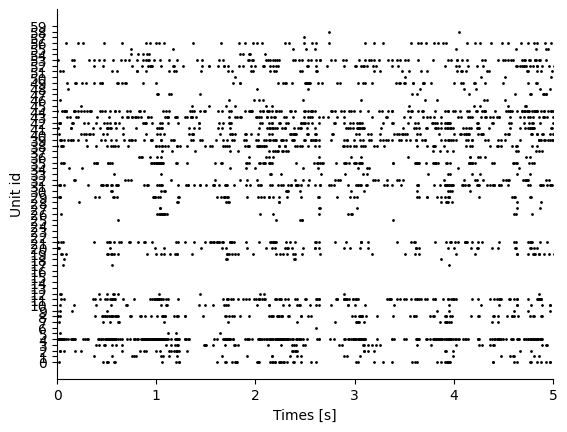

In [24]:
si.plot_rasters(sorting_KS4, unit_ids=sorting_KS4.unit_ids[:60], time_range=(0, 5))

### compare sorter outputs

In [27]:
# comp = si.compare_two_sorters(sorting_KS4, sorting_TDC2, 'KS4', 'TDC2')
# comp = si.compare_two_sorters(sorting_KS4, sorting_KS25, 'KS4', 'KS25')
# comp = si.compare_two_sorters(sorting_SC2, sorting_TDC2, 'SC2', 'TDC2')
# comp = si.compare_two_sorters(sorting_SC2, sorting_KS4, 'SC2', 'KS4')
comp = si.compare_two_sorters(sorting_SC2, sorting_KS4, 'LP', 'KS4')
comp

In [31]:
comp.agreement_scores

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,0.058538,0.004208,0.005739,0.004174,0.011498,0.002751,0.000334,0.001824,0.010594,0.040566,...,0.149148,0.0,0.021327,0.019031,0.008447,0.022257,0.006620,0.086456,0.007886,0.120785
1,0.080986,0.029957,0.007149,0.009443,0.065235,0.003457,0.001564,0.006698,0.018285,0.005617,...,0.010603,0.0,0.002604,0.003107,0.001630,0.002726,0.002532,0.007209,0.002603,0.009655
2,0.010676,0.005788,0.070457,0.835123,0.010181,0.012142,0.000745,0.000937,0.005873,0.004846,...,0.007005,0.0,0.000923,0.002415,0.000488,0.001289,0.003101,0.004530,0.005238,0.004768
3,0.037760,0.119898,0.009608,0.010457,0.770295,0.001777,0.001115,0.002547,0.017705,0.008233,...,0.011725,0.0,0.001384,0.002082,0.000692,0.002317,0.003884,0.006511,0.007018,0.007326
6,0.030147,0.004793,0.008077,0.005562,0.019787,0.001428,0.005158,0.002711,0.013222,0.009687,...,0.060183,0.0,0.010406,0.010626,0.005628,0.009183,0.005705,0.034731,0.004698,0.053896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.011146,0.006306,0.004862,0.006337,0.018708,0.000927,0.000675,0.001873,0.008036,0.008571,...,0.017875,0.0,0.002621,0.002725,0.001201,0.003038,0.002494,0.010182,0.005060,0.013788
477,0.000915,0.000131,0.000286,0.000263,0.000498,0.000000,0.001373,0.000458,0.000487,0.001681,...,0.000947,0.0,0.000842,0.001150,0.004242,0.000298,0.001537,0.000686,0.001068,0.000908
478,0.003347,0.002489,0.002015,0.001733,0.002571,0.000522,0.000766,0.000862,0.002170,0.002204,...,0.002890,0.0,0.001865,0.001517,0.000486,0.001897,0.002047,0.002452,0.001608,0.002543
479,0.000314,0.000138,0.000303,0.000272,0.000362,0.000000,0.000000,0.000000,0.000084,0.000097,...,0.000289,0.0,0.000000,0.000647,0.000000,0.000000,0.000000,0.000102,0.000276,0.000170


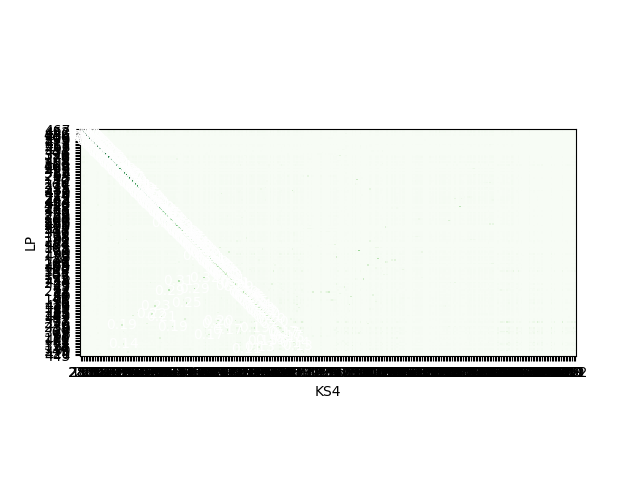

In [28]:
# %matplotlib inline
%matplotlib widget
w = si.plot_agreement_matrix(comp)

**multiple comparison at once**

In [29]:
multi_comp = si.compare_multiple_sorters(
    sorting_list=[sorting_KS4, sorting_TDC2, sorting_KS25, sorting_SC2, sorting_LP],
    name_list=['KS4', 'TDC2', 'KS25', 'SC2', 'LP'],
    spiketrain_mode='union',
    verbose=True
)

Multicomparison step 1: pairwise comparison
Multicomparison step 2: make graph
Multicomparison step 3: clean graph
Removed edge: [('SC2', 226) ('KS4', 192) {'weight': 0.5633034460408339}]
Removed node: ('SC2', 226)
Removed 1 duplicate nodes
Multicomparison step 4: extract agreement from graph


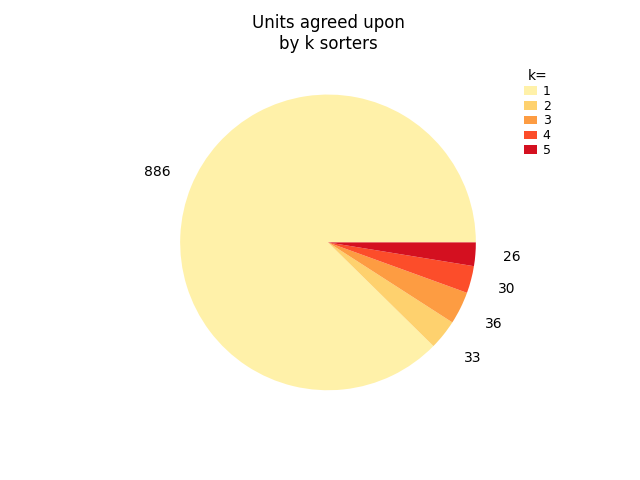

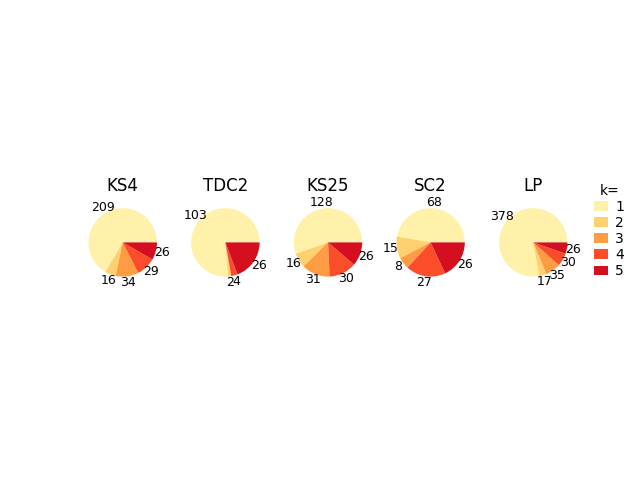

In [30]:
w = si.plot_multicomparison_agreement(multi_comp)
w = si.plot_multicomparison_agreement_by_sorter(multi_comp)